In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
df=pd.read_csv("job_market_analytics_data.csv")
df.head()

,title,company,location,salary_min,salary_max,avg_salary,date_posted
0,Senior Data Analyst,TCS,"Delhi, India",578787,805311,692049.0,2026-01-23
1,Senior Data Analyst,Accenture,"Mumbai, Maharashtra",1060928,1267043,1163985.5,2025-10-18
2,Data Analyst,HCLTech,"Delhi, India",534227,634769,584498.0,2025-11-27
3,Junior Data Analyst,Deloitte,"Ahmedabad, Gujarat",1122270,1392501,1257385.5,2025-12-03
4,Junior Data Analyst,Tech Mahindra,"Delhi, India",1172875,1292034,1232454.5,2025-12-17


In [32]:
top_companies = df["company"].value_counts()


,title,company,location,salary_min,salary_max,avg_salary,date_posted
0,Senior Data Analyst,TCS,"Delhi, India",578787,805311,692049.0,2026-01-23
1,Senior Data Analyst,Accenture,"Mumbai, Maharashtra",1060928,1267043,1163985.5,2025-10-18
2,Data Analyst,HCLTech,"Delhi, India",534227,634769,584498.0,2025-11-27
3,Junior Data Analyst,Deloitte,"Ahmedabad, Gujarat",1122270,1392501,1257385.5,2025-12-03
4,Junior Data Analyst,Tech Mahindra,"Delhi, India",1172875,1292034,1232454.5,2025-12-17
...,...,...,...,...,...,...,...
195,Business Analyst,Deloitte,"Delhi, India",428107,609775,518941.0,2025-12-14
196,Data Analyst Intern,HCLTech,"Delhi, India",706627,778923,742775.0,2026-01-19
197,Data Analyst Intern,TCS,"Remote, India",795910,923930,859920.0,2025-11-14
198,Business Analyst,Deloitte,"Delhi, India",374716,649247,511981.5,2025-12-27


In [35]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   title        200 non-null    object 
 1   company      200 non-null    object 
 2   location     200 non-null    object 
 3   salary_min   200 non-null    int64  
 4   salary_max   200 non-null    int64  
 5   avg_salary   200 non-null    float64
 6   date_posted  200 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 11.1+ KB


title          0
company        0
location       0
salary_min     0
salary_max     0
avg_salary     0
date_posted    0
dtype: int64

In [36]:
df.dtypes

title           object
company         object
location        object
salary_min       int64
salary_max       int64
avg_salary     float64
date_posted     object
dtype: object

In [37]:
df["date_posted"] = pd.to_datetime(df["date_posted"])

In [38]:
df.drop_duplicates(inplace=True)

In [39]:
df["year"] = df["date_posted"].dt.year
df["month"] = df["date_posted"].dt.month
df.head()

,title,company,location,salary_min,salary_max,avg_salary,date_posted,year,month
0,Senior Data Analyst,TCS,"Delhi, India",578787,805311,692049.0,2026-01-23,2026,1
1,Senior Data Analyst,Accenture,"Mumbai, Maharashtra",1060928,1267043,1163985.5,2025-10-18,2025,10
2,Data Analyst,HCLTech,"Delhi, India",534227,634769,584498.0,2025-11-27,2025,11
3,Junior Data Analyst,Deloitte,"Ahmedabad, Gujarat",1122270,1392501,1257385.5,2025-12-03,2025,12
4,Junior Data Analyst,Tech Mahindra,"Delhi, India",1172875,1292034,1232454.5,2025-12-17,2025,12


In [40]:
def experience_level(title):
    title = title.lower()
    if "intern" in title:
        return "Intern"
    elif "junior" in title:
        return "Junior"
    elif "senior" in title:
        return "Senior"
    else:
        return "Mid"

df["experience_level"] = df["title"].apply(experience_level)
df.head()

,title,company,location,salary_min,salary_max,avg_salary,date_posted,year,month,experience_level
0,Senior Data Analyst,TCS,"Delhi, India",578787,805311,692049.0,2026-01-23,2026,1,Senior
1,Senior Data Analyst,Accenture,"Mumbai, Maharashtra",1060928,1267043,1163985.5,2025-10-18,2025,10,Senior
2,Data Analyst,HCLTech,"Delhi, India",534227,634769,584498.0,2025-11-27,2025,11,Mid
3,Junior Data Analyst,Deloitte,"Ahmedabad, Gujarat",1122270,1392501,1257385.5,2025-12-03,2025,12,Junior
4,Junior Data Analyst,Tech Mahindra,"Delhi, India",1172875,1292034,1232454.5,2025-12-17,2025,12,Junior


In [41]:
print("Total Jobs:", len(df))

Total Jobs: 200


In [42]:
top_companies = df["company"].value_counts().head(10)
print(top_companies)

company
Tech Mahindra    34
HCLTech          29
Deloitte         26
Accenture        25
Infosys          23
TCS              22
Wipro            22
Capgemini        19
Name: count, dtype: int64


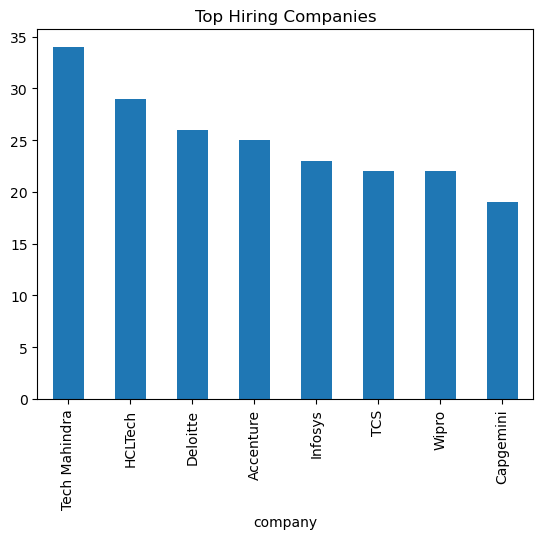

In [43]:
top_companies.plot(kind="bar")
plt.title("Top Hiring Companies")
plt.show()

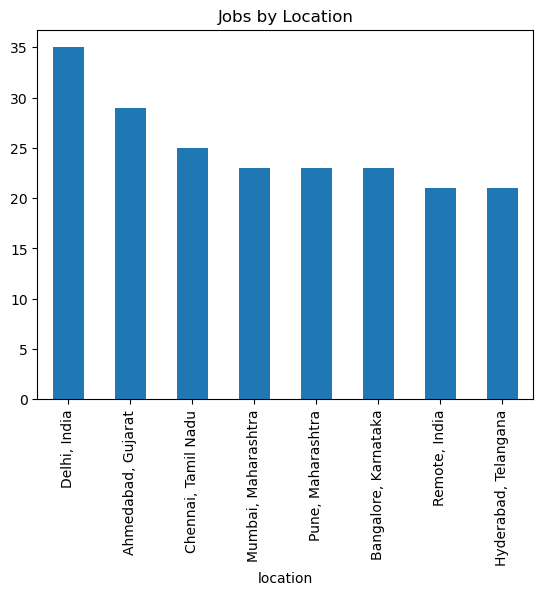

In [44]:
location_jobs = df["location"].value_counts()
location_jobs.plot(kind="bar")
plt.title("Jobs by Location")
plt.show()

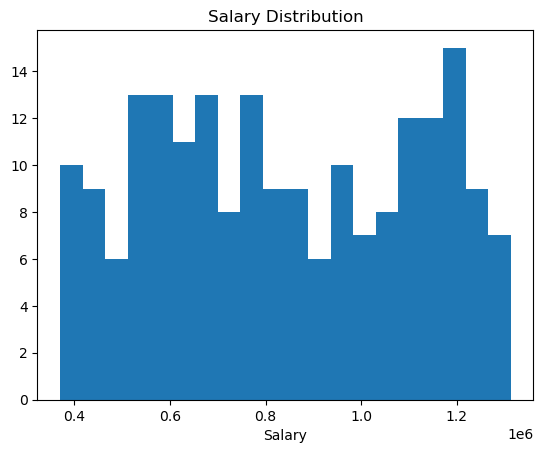

In [45]:
plt.hist(df["avg_salary"], bins=20)
plt.title("Salary Distribution")
plt.xlabel("Salary")
plt.show()

In [46]:
salary_location = df.groupby("location")["avg_salary"].mean()
print(salary_location.sort_values(ascending=False))

location
Chennai, Tamil Nadu     911655.940000
Remote, India           889953.119048
Pune, Maharashtra       875426.413043
Ahmedabad, Gujarat      844669.844828
Bangalore, Karnataka    833753.826087
Hyderabad, Telangana    812090.547619
Delhi, India            809732.500000
Mumbai, Maharashtra     744235.478261
Name: avg_salary, dtype: float64


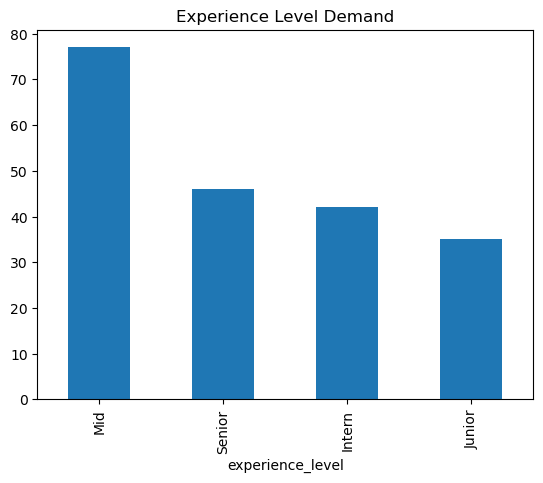

In [47]:
df["experience_level"].value_counts().plot(kind="bar")
plt.title("Experience Level Demand")
plt.show()

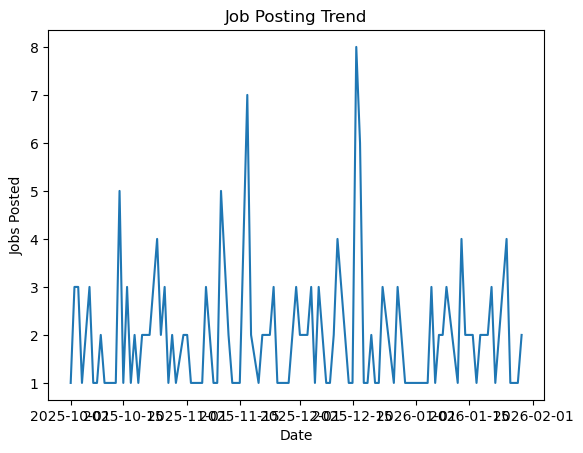

In [48]:
jobs_trend = df.groupby(df["date_posted"].dt.date).size()

jobs_trend.plot()
plt.title("Job Posting Trend")
plt.xlabel("Date")
plt.ylabel("Jobs Posted")
plt.show()

In [49]:
company_salary = df.groupby("company")["avg_salary"].mean()
print(company_salary.sort_values(ascending=False))

company
TCS              926111.772727
Deloitte         893879.807692
Infosys          862152.739130
Tech Mahindra    861314.808824
HCLTech          847359.293103
Capgemini        800968.052632
Accenture        785102.760000
Wipro            711364.000000
Name: avg_salary, dtype: float64


In [50]:
print("Most Hiring Company:", df["company"].mode()[0])
print("Top Hiring Location:", df["location"].mode()[0])
print("Average Market Salary:", df["avg_salary"].mean())

Most Hiring Company: Tech Mahindra
Top Hiring Location: Delhi, India
Average Market Salary: 838994.7


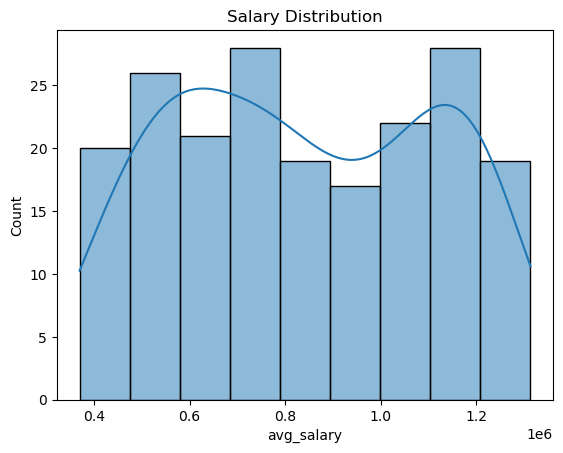

In [52]:
sns.histplot(df["avg_salary"], kde=True)
plt.title("Salary Distribution")
plt.show()

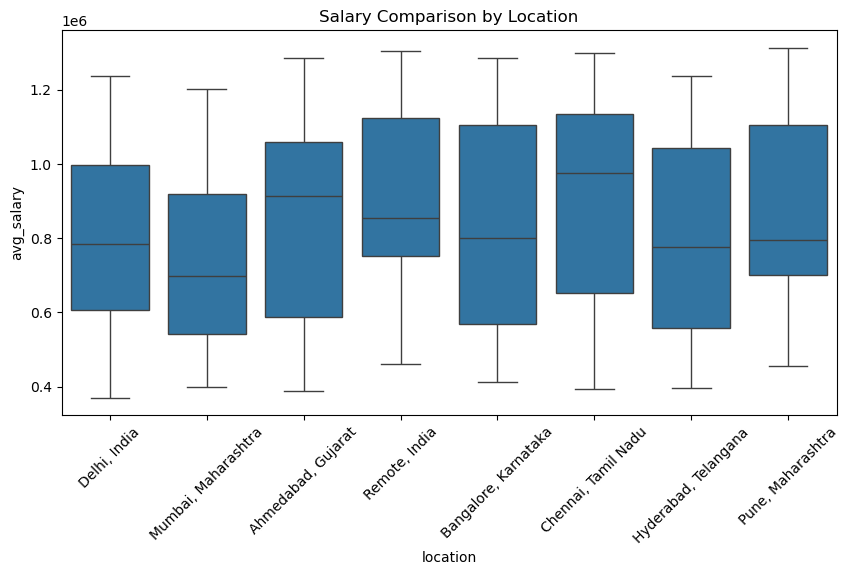

In [53]:
plt.figure(figsize=(10,5))

sns.boxplot(x="location", y="avg_salary", data=df)

plt.xticks(rotation=45)
plt.title("Salary Comparison by Location")
plt.show()

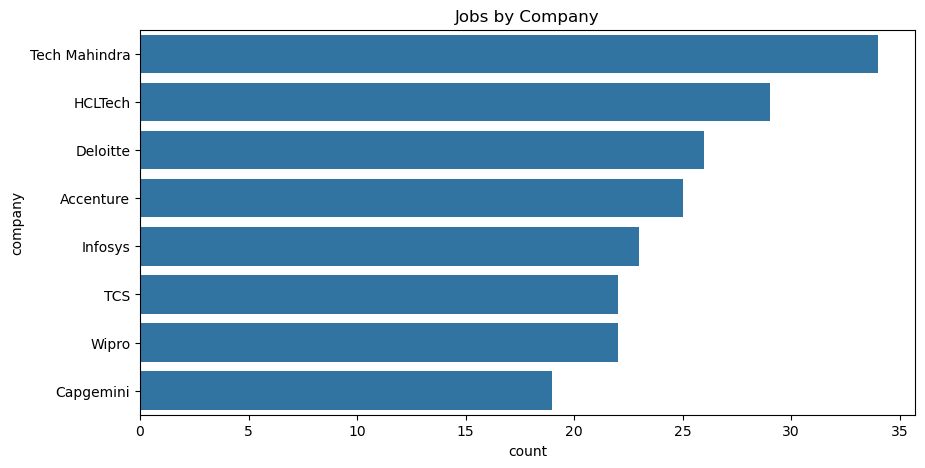

In [54]:
plt.figure(figsize=(10,5))

sns.countplot(y="company", data=df,
              order=df["company"].value_counts().index)

plt.title("Jobs by Company")
plt.show()

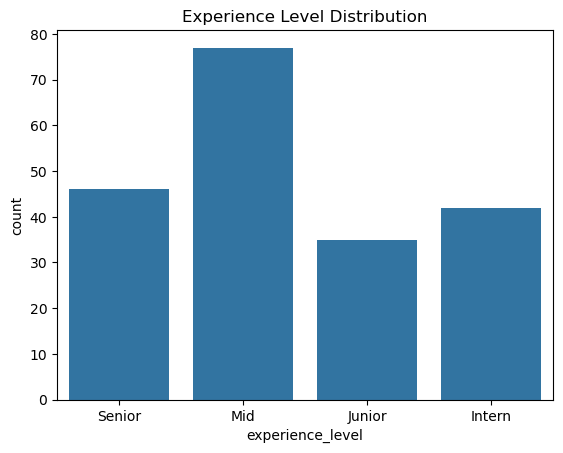

In [55]:
sns.countplot(x="experience_level", data=df)
plt.title("Experience Level Distribution")
plt.show()

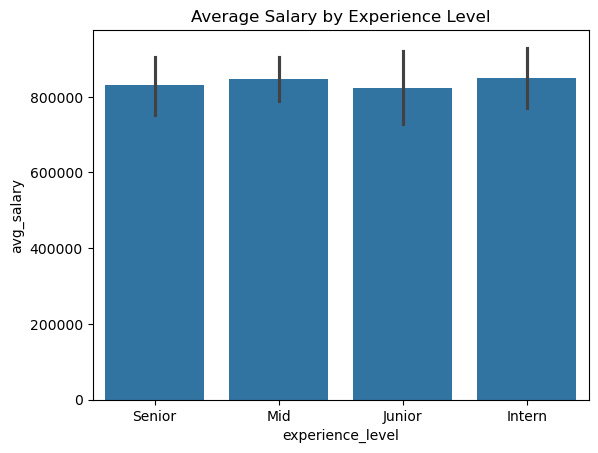

In [56]:
sns.barplot(x="experience_level", y="avg_salary", data=df)
plt.title("Average Salary by Experience Level")
plt.show()

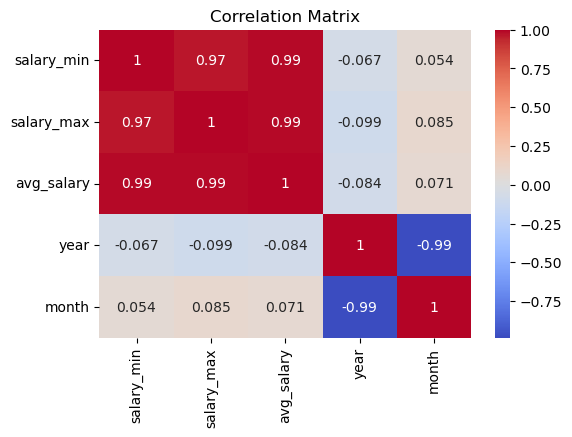

In [57]:
plt.figure(figsize=(6,4))

sns.heatmap(df.corr(numeric_only=True),
            annot=True,
            cmap="coolwarm")

plt.title("Correlation Matrix")
plt.show()

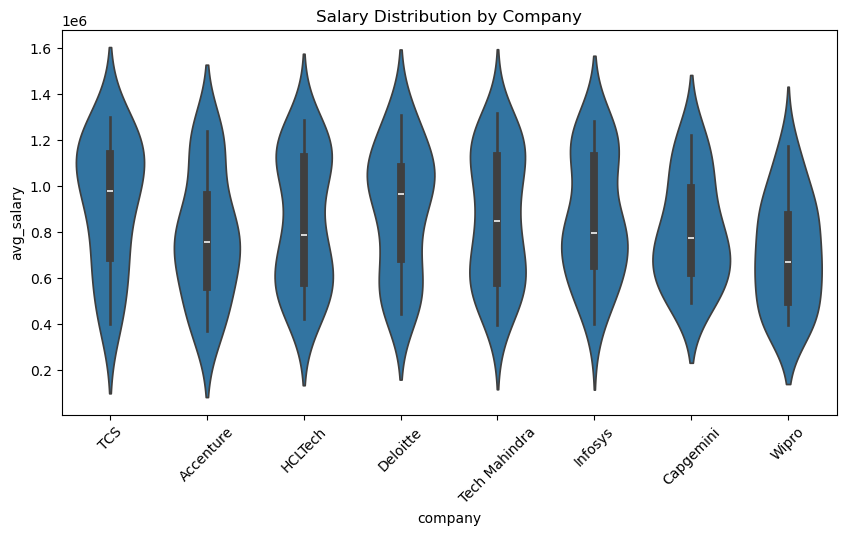

In [59]:
plt.figure(figsize=(10,5))

sns.violinplot(x="company", y="avg_salary", data=df)

plt.xticks(rotation=45)
plt.title("Salary Distribution by Company")
plt.show()

In [60]:
df.to_csv("clean_job_market_data.csv", index=False)